In [1]:
import keras
import numpy as np
import pandas as pd
import tables as tb
import datetime as dt
%pylab inline

Using CNTK backend
C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\cntk_backend.py:21: UserWarning: CNTK backend warning: GPU is not detected. CNTK's CPU version is not fully optimized,please run with GPU to get better performance.
  'CNTK backend warning: GPU is not detected. '


Populating the interactive namespace from numpy and matplotlib


In [2]:
root = 'E:/Data/HDF5/'
filename = root + 'tab.h5'

In [115]:
h5 = tb.open_file(filename, 'w')
h5

File(filename=E:/Data/HDF5/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''

In [116]:
rows = 2000000

In [117]:
rows_des = {
    'Date': tb.StringCol(26, pos=1),
    'No1': tb.IntCol(pos=2), 
    'No2': tb.IntCol(pos=3),
    'No3': tb.Float64Col(pos=4),
    'No4': tb.Float64Col(pos=5),
}

rows_des

{'Date': StringCol(itemsize=26, shape=(), dflt=b'', pos=1),
 'No1': Int32Col(shape=(), dflt=0, pos=2),
 'No2': Int32Col(shape=(), dflt=0, pos=3),
 'No3': Float64Col(shape=(), dflt=0.0, pos=4),
 'No4': Float64Col(shape=(), dflt=0.0, pos=5)}

# 创建无压缩的表格

In [118]:
filters = tb.Filters(complevel=0)  # no compression
filters

Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None)

In [119]:
tab = h5.create_table('/', 'int_floats', rows_des,
                     title='Integers and Floats',
                     expectedrows=rows, filters=filters)

tab

/int_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [120]:
pointer = tab.row

pointer

/int_floats.row (Row), pointing to row #0

## 生成样本数据

In [121]:
ran_int = np.random.randint(0, 10000, size=(rows, 2))
ran_flo = np.random.standard_normal((rows, 2)).round(5)

## 样本数据逐行写入表

In [122]:
%%time 
for i in range(rows):
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i, 0]
    pointer['No2'] = ran_int[i, 1]
    pointer['No3'] = ran_flo[i, 0]
    pointer['No4'] = ran_flo[i, 1]
    pointer.append() # this append the data and moves the pointer one row forward
tab.flush()

Wall time: 6.97 s


一定要记住提交更改。SQLite3 数据库中 **commit** 命令作用，在 PyTables 中由 **flush** 方法实现。

In [123]:
tab

/int_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

## 使用 Numpy 结构数组，可以更高性能、更 Python 风格实现相同功能：

In [124]:
dty = np.dtype([('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

sarray = np.zeros(len(ran_int), dtype=dty)

In [125]:
%%time 
sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:, 0]
sarray['No2'] = ran_int[:, 1]
sarray['No3'] = ran_flo[:, 0]
sarray['No4'] = ran_flo[:, 1]

Wall time: 159 ms


此时，行描述不在需要：

In [126]:
%%time
h5.create_table('/', 'ints_floats_from_array', sarray,
                title='Integers and Floats',
                expectedrows=rows, filters=filters)

Wall time: 100 ms


/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [127]:
h5

File(filename=E:/Data/HDF5/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/int_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

## 删除重复的表

In [128]:
h5.remove_node('/', 'ints_floats_from_array')

## 切片

**表**对象的切片操作与典型的 Python 和 Numpy 对象类似：

In [129]:
tab[:3]

array([(b'2018-04-09 22:44:52.780743', 9661, 2674,  0.01027,  0.65108),
       (b'2018-04-09 22:44:52.780743', 8498, 4531,  0.528  ,  0.26   ),
       (b'2018-04-09 22:44:52.780743', 9092, 2323, -0.3384 , -1.60523)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [130]:
tab[:4]['No3']

array([ 0.01027,  0.528  , -0.3384 , -0.44915])

## 对表及表的子集应用 Numpy 通用函数

In [131]:
%time np.sum(tab[:]['No3'])

Wall time: 154 ms


-1156.6613700000005

In [132]:
%time np.sum(np.sqrt(tab[:]['No1']))

Wall time: 152 ms


133307332.9032435

## 绘制图像

与 ndarray 类似：

2000000
Wall time: 379 ms


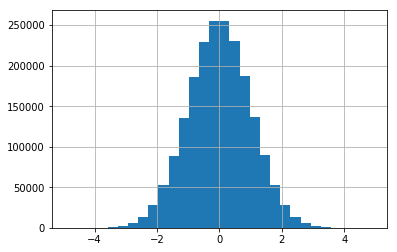

In [133]:
%%time
plt.hist(tab[:]['No3'], bins=30)
plt.grid(True)
print(len(tab[:]['No3']))

# 查询
类似于 SQL 语句

In [134]:
type(tab[:]['No3'])

numpy.ndarray

In [135]:
%%time
results = [(row['No1'], row['No2']) for row in tab.where(
    '((No1 > 9800) | (No1 < 200)) & ((No2 > 4500) | (No1 < 5500))')]

for res in results[:4]:
    print(res)

(9848, 9160)
(91, 7747)
(9982, 6928)
(9815, 8771)
Wall time: 144 ms


# 使用压缩表

In [136]:
filename = root + 'tab.h5c'

h5c = tb.open_file(filename, 'w')

In [137]:
filters = tb.Filters(complevel=4, complib='blosc')
filters

Filters(complevel=4, complib='blosc', shuffle=True, bitshuffle=False, fletcher32=False, least_significant_digit=None)

In [138]:
tabc = h5c.create_table('/', 'ints_floats', sarray,
                       title='Intergers and Floats',
                       expectedrows=rows, filters=filters)

tabc

/ints_floats (Table(2000000,), shuffle, blosc(4)) 'Intergers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [139]:
%%time
res = np.array([(row['No3'], row['No4']) for row in tabc.where(
    '((No3 < - 0.5) | (No3 > 0.5) & ((No4 < -1) | (No4 > 1)))')])[::100]

Wall time: 708 ms


In [140]:
%time arr_non = tab.read()

Wall time: 114 ms


In [141]:
%time arr_com = tabc.read()

Wall time: 110 ms


# 使用数组

In [142]:
tabc.read()

array([(b'2018-04-09 22:44:59.813795', 9661, 2674,  0.01027,  0.65108),
       (b'2018-04-09 22:44:59.813795', 8498, 4531,  0.528  ,  0.26   ),
       (b'2018-04-09 22:44:59.813795', 9092, 2323, -0.3384 , -1.60523),
       ...,
       (b'2018-04-09 22:44:59.813795', 7819, 1037,  0.0919 , -1.00119),
       (b'2018-04-09 22:44:59.813795', 8502, 8667,  0.85112,  1.42203),
       (b'2018-04-09 22:44:59.813795', 5509, 7565, -0.61953,  0.95208)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [143]:
arr_com.shape

(2000000,)

In [144]:
%%time 
arr_int = h5.create_array('/', 'integers', ran_int)
arr_flo = h5.create_array('/', 'floats', ran_flo)

Wall time: 1.34 s


In [145]:
h5

File(filename=E:/Data/HDF5/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/floats (Array(2000000, 2)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/int_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=b'', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/integers (Array(2000000, 2)) ''
  atom := Int32Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

In [ ]:
h5c.close()

# 内存外计算

In [31]:
filename = root + 'array.h5'
h5 = tb.open_file(filename, 'w')

创建一个 EArray 对象，它的第一维可以扩展，而第二维为固定宽度：

In [32]:
n = 1000
ear = h5.create_earray(h5.root, 'ear', atom=tb.Float64Atom(), shape=(0, n))

In [34]:
h5.close()

因为 EArray 对象可以扩展，所以可以以块的形式填充：

In [29]:
%%time
rand = np.random.standard_normal((n, n))

for i in range(750):
    ear.append(rand)
ear.flush()

Wall time: 1min


In [9]:
ear

/ear (EArray(750000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8, 1000)

In [13]:
ear.size_on_disk / 10**9

6.0

In [14]:
2 ** 10

1024

ear 有 $6 G$，为了进行内存外计算，我们需要在数据库中有一个目标 EArray 对象：

In [18]:
out = h5.create_earray(h5.root, 'out', atom=tb.Float64Atom(), shape=(0, n))

## 使用 Expr 子模块进行内存外数值计算

In [22]:
expr = tb.Expr('3 * sin(ear) + sqrt(abs(ear))')

In [24]:
expr.set_output(out, append_mode=True)

In [25]:
%time expr.eval()

Wall time: 3min 58s


/out (EArray(750000, 1000)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8, 1000)

In [30]:
h5.close()

# 一个实例

In [1]:
import keras 
import tables as tb

import sys
sys.path.append('E:/xinlib')

from xinTables import xin_datasets

Using CNTK backend


In [7]:
xin_datasets('E:/Data/HDF5/')

In [7]:
h5 = tb.open_file('E:/Data/HDF5/xindatasets.h5')

In [8]:
h5.root

/ (RootGroup) 'xin datasets'
  children := ['boston_housing' (Group), 'cifar10' (Group), 'cifar100' (Group), 'fashion_mnist' (Group), 'mnist' (Group)]

In [9]:
tab = h5.copy_file('D:/temp/datasets.h5')

OSError: file ``D:/temp/datasets.h5`` already exists; you may want to use the ``overwrite`` argument

In [15]:
h5.close()

In [11]:
myh5 = tb.open_file('D:/temp/datasets.h5')

In [12]:
a = myh5.get_node('/cifar10')

In [13]:
train_data = myh5.get_node('/cifar10/train_dataset')
test_data = myh5.get_node('/cifar10/test_dataset')

In [14]:
d = myh5.get_node('/cifar10/train_dataset/data')

In [15]:
X = myh5.get_node('/cifar10/train_dataset/data')
Y = myh5.get_node('/cifar10/train_dataset/label')

In [20]:
Y[1:9]

array([[9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8]], dtype=uint8)

In [21]:
def data_iter(X, Y, batch_size, shuffle=True):
    '''由一个类 array 数据集生成一个迭代器'''
    n = len(X)
    idx = np.arange(n)
    if shuffle:
        # 等价于 rand_index = np.random.choice(n, size= batch_size)
        # 等价于 np.random.shuffle(idx)
        idx = np.random.permutation(idx)
    for i in np.arange(0, n, batch_size):
        idx = idx[i:min(i + batch_size, n)]
        yield X[idx], Y[idx]

In [42]:
import numpy as np

In [44]:
X.shape

(50000, 32, 32, 3)

In [48]:
n = X.shape[0]
num_train = 0.75 * n
idx = 

In [54]:
np.random.permutation?

In [29]:
net = nn.Sequential()

In [31]:
L = Learning('cifar10', net)

OSError: file ``D:/temp/datasets.h5`` already exists; you may want to use the ``overwrite`` argument

In [ ]:
class Estimator(DataLoader):
    def __init__(self, name,source='E:/Data/HDF5/xindatasets.h5',temp_path='D:/temp/datasets.h5', net):
        super().__init__(name, source, temp_path)
        
    def get_iter(self):
        self.train_iter, self.validate_iter, self.test_iter = self.split(prob, batch_size)
    
    def 